<a href="https://colab.research.google.com/github/wliberatoc/PI/blob/main/26_10_PI_Tarefa_6_(Quinta_Semana_(ERE)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.
4. Envie um áudio curto ao professor explicando cada solução criada por você.

#1. Histograma de Cores

Nos vídeos abaixo, eu discuto o tema de histograma de cores em imagens digitais.

<a href="https://www.youtube.com/watch?v=ioa_mFB_nFg"><img src="https://img.youtube.com/vi/ioa_mFB_nFg/mqdefault.jpg"/></a>

<a href="https://www.youtube.com/watch?v=83RZSK1j8Ak"><img src="https://img.youtube.com/vi/83RZSK1j8Ak/mqdefault.jpg"/></a>

Nesse exercício, quero que você selecione 2 imagens distintas entre si. Uma deve ser preto e branco e a outra colorida.

Plote (desenhe o gráfico) dos seus histogramas na tela via Python e OpenCV.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Imagem preto e branco


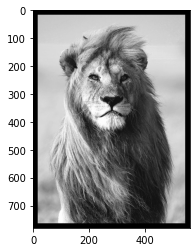

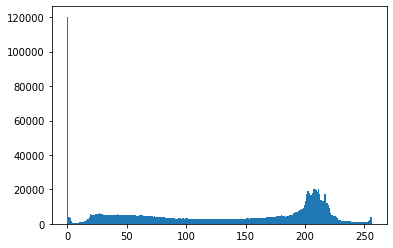

Imagem colorida


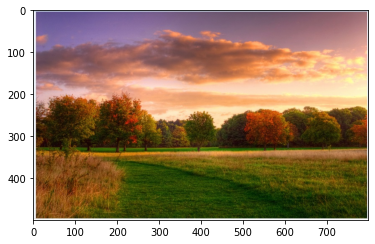

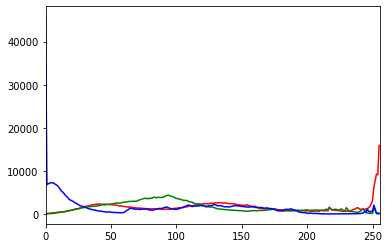

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/My Drive/Colab Notebooks/PI/leao.jpg", 0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Imagem preto e branco")
plt.imshow(img)
plt.show()
plt.hist(img.ravel(),256,[0,256]);
plt.show()

img = cv2.imread('/content/drive/My Drive/Colab Notebooks/PI/fundo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Imagem colorida")
plt.imshow(img)
plt.show()
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

#2. Equalização de histograma

Utilizando a ideia dessa página, crie um algoritmo que faça a equalização de histograma da imagem abaixo, a fim de melhorar seu contraste. 

Sugestão: <a href="https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html">siga este tutorial</a>.

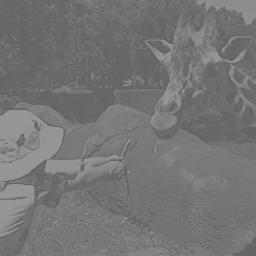

Imagem original


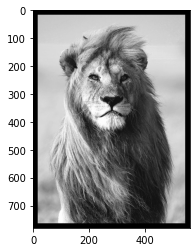

Imagem equalizada


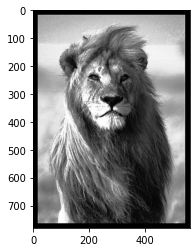

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/My Drive/Colab Notebooks/PI/leao.jpg", 0)
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Imagem original")
plt.imshow(imgRGB)
plt.show()
equalizacao = cv2.equalizeHist(img)
imgEqualizada = cv2.cvtColor(equalizacao, cv2.COLOR_BGR2RGB)
print("Imagem equalizada")
plt.imshow(imgEqualizada)
plt.show()

#3. Meu primeiro buscador de imagens!

[Um jeito muito simples de verificar se uma imagem é igual a outra  é por meio de comparação entre histogramas](https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html). 

Dito isso, você deverá fazer o seguinte:

* Crie uma pasta contendo ao menos 5 imagens, das quais duas precisam ser muito similares em seu conteúdo visual (mas não idênticas). Para facilitar, vamos chamar as imagens muito parecidas de S1 e S2. As imagens restantes que são diferentes, serão D1, D2 e D3.
* Faça uma função que receba as imagens S1 e compare ela com S2, D1, D2 e D3 pelo histograma. 
* Compare a distância de S1 para cada imagem considerando as métricas da Correlação, Chi_Square e Bhattacharrya. 
* Para cada imagem, some as três distâncias ao quadrado e aplique a raiz quadrada: sqrt(Corr^2 + Chi-Sq^2 + Bhatta^2)
* Retorne a imagem mais parecida com S1 (o par que tiver a menor distância)

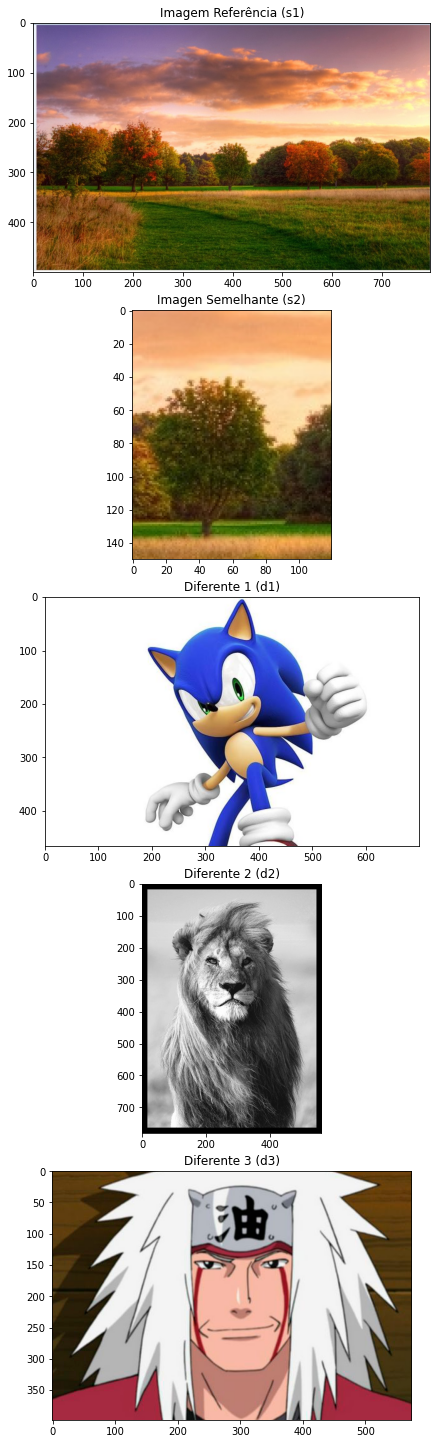


Correlação s2:  0.47555892746021067
Chi-Square s2:  54.58046659999873
Bhattacharrya s2:  0.5650174263157113

Correlação d1:  0.10251037513914336
Chi-Square d1:  70.2825263709767
Bhattacharrya d1:  0.8965799764486918

Correlação d2:  0.1027243414057615
Chi-Square d2:  70.47718245799707
Bhattacharrya d2:  0.960296376274355

Correlação d3:  0.13968226847397758
Chi-Square d3:  149.24289109570094
Bhattacharrya d3:  0.7579173425295904

Com uma distâcia de 54.58546267330803 a seguinte imagem é a mais similar:


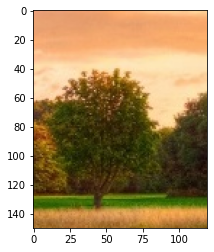

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def criaGrid(imagens, titulos):
  fsw = 20
  fsh = 20
  y = int(len(imagens))
  fig, axis = plt.subplots(y, 1,figsize=(fsw,fsh))
  possicao_X, possicao_Y, titulo = 0, 0, 0
  for img in imagens:
    axis[possicao_Y].set_title(titulos[titulo])
    copiaImg = cv2.cvtColor(imagens[possicao_Y], cv2.COLOR_BGR2RGB)
    axis[possicao_Y].imshow(copiaImg.astype(np.uint8))
    if len(titulos[titulo]) == 0:
      axis[possicao_Y].axis('off')
    titulo += 1
    possicao_Y += 1
  fig.tight_layout(pad=0.5)
  plt.show()

S1 = cv2.imread('/content/drive/My Drive/Colab Notebooks/PI/fundo.jpg')
S2 = cv2.imread('/content/drive/My Drive/Colab Notebooks/PI/img_cortada.jpg')
D1 = cv2.imread('/content/drive/My Drive/Colab Notebooks/PI/sonic.jpg')
D2 = cv2.imread('/content/drive/My Drive/Colab Notebooks/PI/leao.jpg')
D3 = cv2.imread('/content/drive/My Drive/Colab Notebooks/PI/jiraya.png')

def compara(s1, s2, d1, d2, d3):
  hsv_S1 = cv2.cvtColor(s1, cv2.COLOR_BGR2HSV)
  hsv_S2 = cv2.cvtColor(s2, cv2.COLOR_BGR2HSV)
  hsv_D1 = cv2.cvtColor(d1, cv2.COLOR_BGR2HSV)
  hsv_D2 = cv2.cvtColor(d2, cv2.COLOR_BGR2HSV)
  hsv_D3 = cv2.cvtColor(d3, cv2.COLOR_BGR2HSV)
  h_bins = 50
  s_bins = 60
  hist_Size = [h_bins, s_bins]
  canais = [0, 1]

  h_ranges = [0, 180]
  s_ranges = [0, 256]
  ranges = h_ranges + s_ranges

  hist_base = cv2.calcHist([hsv_S1], canais, None, hist_Size, ranges, accumulate=False)
  cv2.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

  hist_s2 = cv2.calcHist([hsv_S2], canais, None, hist_Size, ranges, accumulate=False)
  cv2.normalize(hist_s2, hist_s2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

  hist_d1 = cv2.calcHist([hsv_D1], canais, None, hist_Size, ranges, accumulate=False)
  cv2.normalize(hist_d1, hist_d1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

  hist_d2 = cv2.calcHist([hsv_D2], canais, None, hist_Size, ranges, accumulate=False)
  cv2.normalize(hist_d2, hist_d2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

  hist_d3 = cv2.calcHist([hsv_D3], canais, None, hist_Size, ranges, accumulate=False)
  cv2.normalize(hist_d3, hist_d3, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

  Correlacao = []
  Correlacao.append(cv2.compareHist(hist_base, hist_s2, 0))
  Correlacao.append(cv2.compareHist(hist_base, hist_d1, 0))
  Correlacao.append(cv2.compareHist(hist_base, hist_d2, 0))
  Correlacao.append(cv2.compareHist(hist_base, hist_d3, 0))
  Chi_Square = []
  Chi_Square.append(cv2.compareHist(hist_base, hist_s2, 1))
  Chi_Square.append(cv2.compareHist(hist_base, hist_d1, 1))
  Chi_Square.append(cv2.compareHist(hist_base, hist_d2, 1))
  Chi_Square.append(cv2.compareHist(hist_base, hist_d3, 1))
  Bhattacharrya = []
  Bhattacharrya.append(cv2.compareHist(hist_base, hist_s2, 3))
  Bhattacharrya.append(cv2.compareHist(hist_base, hist_d1, 3))
  Bhattacharrya.append(cv2.compareHist(hist_base, hist_d2, 3))
  Bhattacharrya.append(cv2.compareHist(hist_base, hist_d3, 3))
  print('')
  print("Correlação s2: ", Correlacao[0])
  print("Chi-Square s2: ", Chi_Square[0])
  print("Bhattacharrya s2: ", Bhattacharrya[0])
  print('')
  print("Correlação d1: ", Correlacao[1])
  print("Chi-Square d1: ", Chi_Square[1])
  print("Bhattacharrya d1: ", Bhattacharrya[1])
  print('')
  print("Correlação d2: ", Correlacao[2])
  print("Chi-Square d2: ", Chi_Square[2])
  print("Bhattacharrya d2: ", Bhattacharrya[2])
  print('')
  print("Correlação d3: ", Correlacao[3])
  print("Chi-Square d3: ", Chi_Square[3])
  print("Bhattacharrya d3: ", Bhattacharrya[3])
  print('')
  menor = (Correlacao[0]**2 + Chi_Square[0]**2 + Bhattacharrya[0]**2)**(1/2)
  menor_Indice = 0
  for i in range(1,4):
    raiz = (Correlacao[i]**2 + Chi_Square[i]**2 + Bhattacharrya[i]**2)**(1/2)
    if raiz < menor:
      menor = raiz
      menor_Indice = i
  if menor_Indice == 0:
    return s2, menor
  elif menor_Indice == 1:
    return d1, menor
  elif menor_Indice == 2:
    return d2, menor
  elif menor_Indice == 3:
    return d3, menor

criaGrid([S1,S2,D1,D2,D3], ['Imagem Referência (s1)','Imagen Semelhante (s2)','Diferente 1 (d1)','Diferente 2 (d2)','Diferente 3 (d3)'])
maisParecida, valor = compara(S1,S2,D1,D2,D3)
print('Com uma distâcia de',valor,'a seguinte imagem é a mais similar:')
imgRGB = cv2.cvtColor(maisParecida, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

#4. Vídeo da Erosão e Dilatação

Crie duas funções chamada videoErosao e videoDilatacao.

A função videoErosao() receberá uma imagem em preto e branco como a apresentada abaixo e deverá aplicar a operação de erosão sucessivamente, até ela desaparecer. Faça um vídeo que aplique essa operação aos poucos, em formato de animação.

Realize procedimento parecido para videoDilatacao(), só que fazendo o oposto com a operação de dilatação.

OBS: <a href="https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html">Esse texto deverá ajudar</a>.

E para gerar o vídeo, <a href="https://colab.research.google.com/drive/1sQAxhv5nIWDvwt82osa2x41zVtUFyx1O?usp=sharing">olhe aqui</a>.

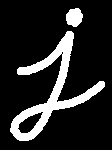

In [ ]:
#não funciona no coolab
import cv2
import numpy as np

def videoErosao(imagem):
    frames_erosao = []
    for i in range(7):
        frames_erosao.append(erosion(cv2.MORPH_RECT, i))
    for i in range(12):
        frames_erosao.append(erosion(cv2.MORPH_CROSS, i))
    for i in range(9):
        frames_erosao.append(erosion(cv2.MORPH_ELLIPSE, i))
    out = cv2.VideoWriter('video_erosao.avi', fourcc, 1.5, (112, 150))
    for frame in frames_erosao :
        out.write(frame)
    out.release()

def videoDilatacao(imagem):
    frames_dilatacao = []
    for i in range(55):
        frames_dilatacao.append(dilatation(cv2.MORPH_RECT, i))
    for i in range(150):
        frames_dilatacao.append(dilatation(cv2.MORPH_CROSS, i)) 
    for i in range(70):
        frames_dilatacao.append(dilatation(cv2.MORPH_ELLIPSE, i))
    out = cv2.VideoWriter('video_dilatacao.avi', fourcc, 22, (112, 150))
    for frame in frames_dilatacao:
        out.write(frame)
    out.release()
    
def erosion(erosion_type, erosion_size):
    element = cv2.getStructuringElement(erosion_type, (2*erosion_size + 1, 2*erosion_size+1), (erosion_size, erosion_size))
    erosion_dst = cv2.erode(src, element)
    return erosion_dst
    
def dilatation(dilatation_type, dilatation_size):
    element = cv2.getStructuringElement(dilatation_type, (2*dilatation_size + 1, 2*dilatation_size+1), (dilatation_size, dilatation_size))
    dilatation_dst = cv2.dilate(src, element)
    return dilatation_dst
    
src = cv2.imread('j.png')

fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')

videoErosao(src)
videoDilatacao(src)
